In [3]:
!pip install fredapi

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [11]:
#creating Fred API
from fredapi import Fred
fred_key = 'insert_key'

# Create the Fred object

In [13]:
fred = Fred(api_key=fred_key)

# Search for economic data

In [20]:
#searching through data
sp_search = fred.search('S&P',order_by="popularity")

In [21]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-05-01   2023-05-01   
CSUSHPINSA          CSUSHPINSA     2023-05-01   2023-05-01   
SP500                    SP500     2023-05-01   2023-05-01   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-05-01   2023-05-01   
CSUSHPISA            CSUSHPISA     2023-05-01   2023-05-01   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
CSUSHPISA         S&P/Case-Shiller U.S. National Home Price Index   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-04-27  Daily, Close   
CSUSHPINSA            1987-01-01      2023-02-01       Monthly   
SP500                 2013-04-29      2023-04-28  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2023-04-27  Daily, Close   
CSUSHPISA             1987-01-01      2023-02-01       Monthly   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
SP500                        D               Index               Index   
BAMLH0A0HYM2EY               D             Percent                   %   
CSUSHPISA                    M  Index Jan 2000=100  Index Jan 2000=100   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
CSUSHPISA           Seasonally Adjusted                        SA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2023-04-28 09:14:02-05:00         95   
CSUSHPINSA      2023-04-25 08:13:02-05:00         91   
SP500           2023-04-28 19:10:50-05:00         84   
BAMLH0A0HYM2EY  2023-04-28 09:14:06-05:00         83   
CSUSHPISA       2023-04-25 08:13:02-05:00         82   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
SP500           The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
CSUSHPISA       For more information regarding the index, plea...

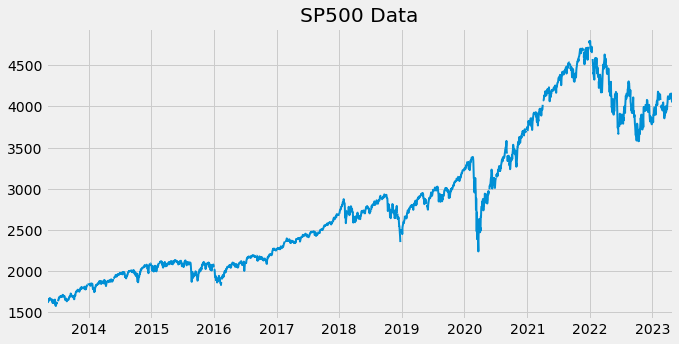

In [37]:
#plotting one specific series i.e. SP500
sp500 = fred.get_series(series_id='SP500')
sp500.plot(title='SP500 Data',lw=2,figsize=(10,5))
plt.show()

# Pull and join multiple data series

In [136]:
#getting unemployment data and filtering it to get only state wise data
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['id'].str.contains('UR')]

In [137]:
unemp_df.head()

id realtime_start realtime_end                            title  \
series id                                                                      
CAUR       CAUR     2023-05-01   2023-05-01  Unemployment Rate in California   
NYUR       NYUR     2023-05-01   2023-05-01    Unemployment Rate in New York   
TXUR       TXUR     2023-05-01   2023-05-01       Unemployment Rate in Texas   
FLUR       FLUR     2023-05-01   2023-05-01     Unemployment Rate in Florida   
ALUR       ALUR     2023-05-01   2023-05-01     Unemployment Rate in Alabama   

          observation_start observation_end frequency frequency_short  \
series id                                                               
CAUR             1976-01-01      2023-02-01   Monthly               M   
NYUR             1976-01-01      2023-02-01   Monthly               M   
TXUR             1976-01-01      2023-02-01   Monthly               M   
FLUR             1976-01-01      2023-02-01   Monthly               M   
ALUR             1976-01-01      2023-02-01   Monthly               M   

             units units_short  seasonal_adjustment seasonal_adjustment_short  \
series id                                                                       
CAUR       Percent           %  Seasonally Adjusted                        SA   
NYUR       Percent           %  Seasonally Adjusted                        SA   
TXUR       Percent           %  Seasonally Adjusted                        SA   
FLUR       Percent           %  Seasonally Adjusted                        SA   
ALUR       Percent           %  Seasonally Adjusted                        SA   

                        last_updated popularity notes  
series id                                              
CAUR       2023-03-27 16:09:02-05:00         57  None  
NYUR       2023-03-27 16:09:03-05:00         50  None  
TXUR       2023-03-27 16:08:02-05:00         51  None  
FLUR       2023-03-27 16:09:03-05:00         47  None  
ALUR       2023-03-27 16:09:04-05:00         38  None

In [138]:
#going through each series for state wise data to join it and adding it to one list
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)

In [139]:
#concatinating all tables
unemp_results = pd.concat(all_results, axis=1)

In [213]:
unemp_results.head()

California  New York  Texas  Florida  Alabama  Michigan  \
1976-01-01         9.2      10.3    5.8      9.7      6.6       9.9   
1976-02-01         9.2      10.3    5.8      9.7      6.6       9.9   
1976-03-01         9.1      10.2    5.9      9.6      6.6       9.9   
1976-04-01         9.1      10.2    5.9      9.5      6.5       9.8   
1976-05-01         9.0      10.1    5.9      9.3      6.4       9.6   

            Pennsylvania  Illinois  Massachusetts  North Carolina  Ohio  \
1976-01-01           8.0       6.6           10.5             6.4   8.1   
1976-02-01           8.1       6.6           10.5             6.4   8.1   
1976-03-01           8.1       6.6           10.5             6.4   8.1   
1976-04-01           8.1       6.6           10.3             6.3   8.0   
1976-05-01           8.1       6.6           10.1             6.1   7.8   

            Minnesota  Washington  Colorado  New Jersey  Georgia  Utah  \
1976-01-01        6.0         8.5       5.8        10.3      8.4   5.8   
1976-02-01        6.0         8.5       5.7        10.3      8.4   5.9   
1976-03-01        5.9         8.4       5.7        10.3      8.4   5.8   
1976-04-01        5.8         8.5       5.6        10.3      8.3   5.8   
1976-05-01        5.7         8.5       5.6        10.3      8.1   5.7   

            Alaska  Arizona  Kentucky  South Carolina  Oregon  Oklahoma  \
1976-01-01     7.1     10.2       5.6             7.4     9.5       5.8   
1976-02-01     7.1     10.2       5.6             7.4     9.5       5.8   
1976-03-01     7.0     10.1       5.6             7.3     9.4       5.8   
1976-04-01     6.9     10.0       5.6             7.2     9.2       5.8   
1976-05-01     6.9      9.8       5.5             7.0     9.1       5.7   

            Wisconsin  Virginia  Indiana  Tennessee  Nevada  Missouri  \
1976-01-01        5.8       6.1      6.6        6.0     9.2       5.9   
1976-02-01        5.8       6.1      6.6        6.0     9.2       5.9   
1976-03-01        5.7       6.1      6.5        6.0     9.2       5.9   
1976-04-01        5.6       6.0      6.3        6.0     9.0       6.0   
1976-05-01        5.5       5.9      6.0        5.9     8.9       6.0   

            New Mexico  Puerto Rico  Connecticut  Arkansas  West Virginia  \
1976-01-01         8.6         19.6          9.8       7.3            7.5   
1976-02-01         8.7         19.5          9.8       7.3            7.5   
1976-03-01         8.7         19.3          9.8       7.3            7.5   
1976-04-01         8.6         19.0          9.6       7.2            7.5   
1976-05-01         8.6         18.9          9.4       7.1            7.4   

            Iowa  Louisiana  Mississippi  South Dakota  Kansas  North Dakota  \
1976-01-01   4.3        6.3          6.7           3.3     4.2           3.4   
1976-02-01   4.3        6.3          6.7           3.3     4.2           3.4   
1976-03-01   4.3        6.3          6.6           3.2     4.2           3.4   
1976-04-01   4.2        6.4          6.4           3.1     4.2           3.5   
1976-05-01   4.1        6.5          6.3           3.1     4.2           3.6   

            New Hampshire  Nebraska  the District of Columbia  Wyoming  \
1976-01-01            6.5       3.3                       8.7      4.1   
1976-02-01            6.5       3.3                       8.7      4.1   
1976-03-01            6.5       3.3                       8.6      4.1   
1976-04-01            6.5       3.2                       8.5      4.0   
1976-05-01            6.5       3.1                       8.4      3.9   

            Hawaii  Maine  Montana  Rhode Island  Delaware  Idaho  Maryland  \
1976-01-01     9.8    8.7      5.8           7.8       8.0    5.6       6.4   
1976-02-01     9.8    8.7      5.8           7.8       8.0    5.6       6.4   
1976-03-01     9.8    8.6      5.8           7.7       8.0    5.6       6.4   
1976-04-01     9.7    8.6      5.8           7.7       8.1    5.6       6.4   
1976-05-01     

In [141]:
#droping columns that are not specifically for a state
unemp_results = unemp_results.drop(['CMWRUR','CWSTUR','CSOUUR','CNERUR','CNEWUR'], axis=1)

In [214]:
unemp_results.head()


California  New York  Texas  Florida  Alabama  Michigan  \
1976-01-01         9.2      10.3    5.8      9.7      6.6       9.9   
1976-02-01         9.2      10.3    5.8      9.7      6.6       9.9   
1976-03-01         9.1      10.2    5.9      9.6      6.6       9.9   
1976-04-01         9.1      10.2    5.9      9.5      6.5       9.8   
1976-05-01         9.0      10.1    5.9      9.3      6.4       9.6   

            Pennsylvania  Illinois  Massachusetts  North Carolina  Ohio  \
1976-01-01           8.0       6.6           10.5             6.4   8.1   
1976-02-01           8.1       6.6           10.5             6.4   8.1   
1976-03-01           8.1       6.6           10.5             6.4   8.1   
1976-04-01           8.1       6.6           10.3             6.3   8.0   
1976-05-01           8.1       6.6           10.1             6.1   7.8   

            Minnesota  Washington  Colorado  New Jersey  Georgia  Utah  \
1976-01-01        6.0         8.5       5.8        10.3      8.4   5.8   
1976-02-01        6.0         8.5       5.7        10.3      8.4   5.9   
1976-03-01        5.9         8.4       5.7        10.3      8.4   5.8   
1976-04-01        5.8         8.5       5.6        10.3      8.3   5.8   
1976-05-01        5.7         8.5       5.6        10.3      8.1   5.7   

            Alaska  Arizona  Kentucky  South Carolina  Oregon  Oklahoma  \
1976-01-01     7.1     10.2       5.6             7.4     9.5       5.8   
1976-02-01     7.1     10.2       5.6             7.4     9.5       5.8   
1976-03-01     7.0     10.1       5.6             7.3     9.4       5.8   
1976-04-01     6.9     10.0       5.6             7.2     9.2       5.8   
1976-05-01     6.9      9.8       5.5             7.0     9.1       5.7   

            Wisconsin  Virginia  Indiana  Tennessee  Nevada  Missouri  \
1976-01-01        5.8       6.1      6.6        6.0     9.2       5.9   
1976-02-01        5.8       6.1      6.6        6.0     9.2       5.9   
1976-03-01        5.7       6.1      6.5        6.0     9.2       5.9   
1976-04-01        5.6       6.0      6.3        6.0     9.0       6.0   
1976-05-01        5.5       5.9      6.0        5.9     8.9       6.0   

            New Mexico  Puerto Rico  Connecticut  Arkansas  West Virginia  \
1976-01-01         8.6         19.6          9.8       7.3            7.5   
1976-02-01         8.7         19.5          9.8       7.3            7.5   
1976-03-01         8.7         19.3          9.8       7.3            7.5   
1976-04-01         8.6         19.0          9.6       7.2            7.5   
1976-05-01         8.6         18.9          9.4       7.1            7.4   

            Iowa  Louisiana  Mississippi  South Dakota  Kansas  North Dakota  \
1976-01-01   4.3        6.3          6.7           3.3     4.2           3.4   
1976-02-01   4.3        6.3          6.7           3.3     4.2           3.4   
1976-03-01   4.3        6.3          6.6           3.2     4.2           3.4   
1976-04-01   4.2        6.4          6.4           3.1     4.2           3.5   
1976-05-01   4.1        6.5          6.3           3.1     4.2           3.6   

            New Hampshire  Nebraska  the District of Columbia  Wyoming  \
1976-01-01            6.5       3.3                       8.7      4.1   
1976-02-01            6.5       3.3                       8.7      4.1   
1976-03-01            6.5       3.3                       8.6      4.1   
1976-04-01            6.5       3.2                       8.5      4.0   
1976-05-01            6.5       3.1                       8.4      3.9   

            Hawaii  Maine  Montana  Rhode Island  Delaware  Idaho  Maryland  \
1976-01-01     9.8    8.7      5.8           7.8       8.0    5.6       6.4   
1976-02-01     9.8    8.7      5.8           7.8       8.0    5.6       6.4   
1976-03-01     9.8    8.6      5.8           7.7       8.0    5.6       6.4   
1976-04-01     9.7    8.6      5.8           7.7       8.1    5.6       6.4   
1976-05-01     

In [143]:
#checking for null values
unemp_results.isna().sum(axis=1)

1976-01-01    0
1976-02-01    0
1976-03-01    0
1976-04-01    0
1976-05-01    0
             ..
2022-10-01    0
2022-11-01    0
2022-12-01    0
2023-01-01    0
2023-02-01    0
Length: 566, dtype: int64

In [144]:
uemp_states=unemp_results

In [145]:
#picking names for each state from orignal dataframe and adding it to dict
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
#replacing column names
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [146]:
px.line(uemp_states)

# Unemployment rate for states on specific date

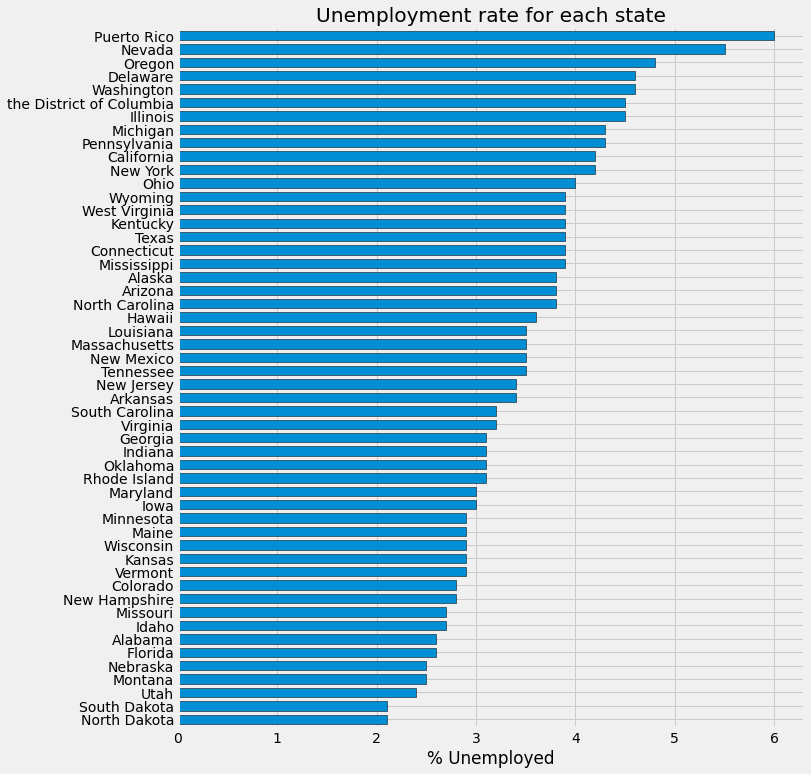

In [167]:
#from this we can check unemployment rate in each state on specific dates
ax = uemp_states.loc[uemp_states.index == '2023-01-01'].T.sort_values('2023-01-01')\
    .plot(kind='barh', figsize=(10,12), title='Unemployment rate for each state', width=0.7, edgecolor='black')
ax.set_xlabel('% Unemployed')
ax.legend().remove()
plt.show()

# Participation rate data

In [215]:
part_df = fred.search('participation rate state',filter=('frequency','Monthly'))
part_df = part_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")
part_df.head()

id realtime_start realtime_end  \
series id                                              
CIVPART          CIVPART     2023-05-01   2023-05-01   
LNS11300002  LNS11300002     2023-05-01   2023-05-01   
LNS11300060  LNS11300060     2023-05-01   2023-05-01   
LNS11300001  LNS11300001     2023-05-01   2023-05-01   
LNS11324230  LNS11324230     2023-05-01   2023-05-01   

                                                       title  \
series id                                                      
CIVPART                       Labor Force Participation Rate   
LNS11300002           Labor Force Participation Rate - Women   
LNS11300060      Labor Force Participation Rate - 25-54 Yrs.   
LNS11300001             Labor Force Participation Rate - Men   
LNS11324230  Labor Force Participation Rate - 55 Yrs. & over   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
CIVPART            1948-01-01      2023-03-01   Monthly               M   
LNS11300002        1948-01-01      2023-03-01   Monthly               M   
LNS11300060        1948-01-01      2023-03-01   Monthly               M   
LNS11300001        1948-01-01      2023-03-01   Monthly               M   
LNS11324230        1948-01-01      2023-03-01   Monthly               M   

               units units_short  seasonal_adjustment  \
series id                                               
CIVPART      Percent           %  Seasonally Adjusted   
LNS11300002  Percent           %  Seasonally Adjusted   
LNS11300060  Percent           %  Seasonally Adjusted   
LNS11300001  Percent           %  Seasonally Adjusted   
LNS11324230  Percent           %  Seasonally Adjusted   

            seasonal_adjustment_short              last_updated popularity  \
series id                                                                    
CIVPART                            SA 2023-04-07 07:44:02-05:00         85   
LNS11300002                        SA 2023-04-07 07:44:07-05:00         67   
LNS11300060                        SA 2023-04-07 07:44:07-05:00         67   
LNS11300001                        SA 2023-04-07 07:44:13-05:00         61   
LNS11324230                        SA 2023-04-07 07:44:14-05:00         53   

                                                         notes  
series id                                                       
CIVPART      The series comes from the 'Current Population ...  
LNS11300002  To obtain estimates of women worker employment...  
LNS11300060  The series comes from the 'Current Population ...  
LNS11300001  The series comes from the 'Current Population ...  
LNS11324230  The series comes from the 'Current Population ...

In [192]:
#droping extra rows that are not specific for states
new_part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for')]


In [193]:
#going through each series for state wise data to join it and adding it to one list
all_result_part = []

for myid in new_part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_result_part.append(results)

In [194]:
part_states = pd.concat(all_result_part, axis=1)

In [216]:
part_states.head()

California  Alabama  Wisconsin  Minnesota  New York  Florida  \
1976-01-01        62.6     57.0       65.6       65.6      58.0     55.8   
1976-02-01        62.4     56.9       65.5       65.5      58.0     55.7   
1976-03-01        62.2     56.8       65.4       65.4      58.0     55.5   
1976-04-01        62.2     56.8       65.4       65.4      58.0     55.5   
1976-05-01        62.3     56.8       65.5       65.5      58.1     55.4   

            Texas  Maine  Michigan  Colorado  Kentucky  Mississippi  \
1976-01-01   63.8   62.1      61.6      67.2      60.5         58.8   
1976-02-01   63.5   61.9      61.5      67.0      60.3         58.6   
1976-03-01   63.4   61.9      61.5      66.8      60.2         58.5   
1976-04-01   63.5   61.8      61.6      66.6      60.1         58.5   
1976-05-01   63.6   61.7      61.7      66.5      60.1         58.5   

            North Carolina  New Mexico  Arizona  Ohio  Illinois  Louisiana  \
1976-01-01            66.5        60.8     59.5  61.7      63.0       56.8   
1976-02-01            66.3        60.5     59.2  61.7      63.0       56.6   
1976-03-01            66.2        60.3     59.1  61.7      62.9       56.5   
1976-04-01            66.2        60.3     59.1  61.6      62.9       56.4   
1976-05-01            66.3        60.3     59.1  61.6      63.0       56.4   

            Georgia  Massachusetts  Pennsylvania  Iowa  Virginia  Utah  \
1976-01-01     63.7           64.8          58.4  64.4      65.9  62.8   
1976-02-01     63.6           64.7          58.3  64.3      65.8  62.6   
1976-03-01     63.5           64.6          58.3  64.2      65.6  62.5   
1976-04-01     63.5           64.6          58.3  64.1      65.5  62.5   
1976-05-01     63.6           64.6          58.3  64.1      65.4  62.6   

            Tennessee  South Carolina  Alaska  Connecticut  New Hampshire  \
1976-01-01       59.6            65.3    69.0         64.2           65.9   
1976-02-01       59.4            65.2    68.4         64.1           65.6   
1976-03-01       59.3            65.0    67.8         64.0           65.6   
1976-04-01       59.3            64.9    67.9         64.1           65.7   
1976-05-01       59.4            64.7    67.9         64.3           66.0   

            Missouri  Indiana  West Virginia  New Jersey  Wyoming  Nebraska  \
1976-01-01      60.5     64.0           52.5        61.5     65.3      64.9   
1976-02-01      60.3     63.9           52.4        61.4     64.9      64.9   
1976-03-01      60.3     63.8           52.3        61.4     64.7      64.8   
1976-04-01      60.4     63.8           52.3        61.5     64.9      64.8   
1976-05-01      60.6     63.9           52.2        61.6     65.2      64.8   

            Oklahoma  South Dakota  Vermont  Nevada  Oregon  Washington  \
1976-01-01      59.3          64.6     63.6    71.3    62.9        60.9   
1976-02-01      59.2          64.4     63.4    70.8    62.7        60.7   
1976-03-01      59.1          64.4     63.2    70.5    62.5        60.6   
1976-04-01      59.0          64.3     63.5    70.4    62.4        60.6   
1976-05-01      59.0          64.3     63.6    70.5    62.5        60.7   

            Maryland  Arkansas  Idaho  Kansas  Montana  Hawaii  North Dakota  \
1976-01-01      64.3      57.9   63.0    65.1     62.7    69.9          62.6   
1976-02-01      64.2      57.8   62.8    65.0     62.5    69.6          62.4   
1976-03-01      64.1      57.7   62.7    64.9     62.4    69.6          62.3   
1976-04-01      64.1      57.7   62.7    65.0     62.3    69.4          62.5   
1976-05-01      64.1      57.7   62.8    65.1     62.2    69.3          62.6   

            Delaware  Rhode Island  District Of Columbia  
1976-01-01      62.7          63.8                  64.4  
1976-02-01      62.5          63.7                  64.5  
1976-03-01      62.5          63.6                  64.5  
1976-04-01      62.4          63.7                  64.5  
1976-05-01      62.4          63.6               

In [198]:
#picking names for each state from orignal dataframe and adding it to dict
part_id_to_state = new_part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [217]:
part_states.head()

California  Alabama  Wisconsin  Minnesota  New York  Florida  \
1976-01-01        62.6     57.0       65.6       65.6      58.0     55.8   
1976-02-01        62.4     56.9       65.5       65.5      58.0     55.7   
1976-03-01        62.2     56.8       65.4       65.4      58.0     55.5   
1976-04-01        62.2     56.8       65.4       65.4      58.0     55.5   
1976-05-01        62.3     56.8       65.5       65.5      58.1     55.4   

            Texas  Maine  Michigan  Colorado  Kentucky  Mississippi  \
1976-01-01   63.8   62.1      61.6      67.2      60.5         58.8   
1976-02-01   63.5   61.9      61.5      67.0      60.3         58.6   
1976-03-01   63.4   61.9      61.5      66.8      60.2         58.5   
1976-04-01   63.5   61.8      61.6      66.6      60.1         58.5   
1976-05-01   63.6   61.7      61.7      66.5      60.1         58.5   

            North Carolina  New Mexico  Arizona  Ohio  Illinois  Louisiana  \
1976-01-01            66.5        60.8     59.5  61.7      63.0       56.8   
1976-02-01            66.3        60.5     59.2  61.7      63.0       56.6   
1976-03-01            66.2        60.3     59.1  61.7      62.9       56.5   
1976-04-01            66.2        60.3     59.1  61.6      62.9       56.4   
1976-05-01            66.3        60.3     59.1  61.6      63.0       56.4   

            Georgia  Massachusetts  Pennsylvania  Iowa  Virginia  Utah  \
1976-01-01     63.7           64.8          58.4  64.4      65.9  62.8   
1976-02-01     63.6           64.7          58.3  64.3      65.8  62.6   
1976-03-01     63.5           64.6          58.3  64.2      65.6  62.5   
1976-04-01     63.5           64.6          58.3  64.1      65.5  62.5   
1976-05-01     63.6           64.6          58.3  64.1      65.4  62.6   

            Tennessee  South Carolina  Alaska  Connecticut  New Hampshire  \
1976-01-01       59.6            65.3    69.0         64.2           65.9   
1976-02-01       59.4            65.2    68.4         64.1           65.6   
1976-03-01       59.3            65.0    67.8         64.0           65.6   
1976-04-01       59.3            64.9    67.9         64.1           65.7   
1976-05-01       59.4            64.7    67.9         64.3           66.0   

            Missouri  Indiana  West Virginia  New Jersey  Wyoming  Nebraska  \
1976-01-01      60.5     64.0           52.5        61.5     65.3      64.9   
1976-02-01      60.3     63.9           52.4        61.4     64.9      64.9   
1976-03-01      60.3     63.8           52.3        61.4     64.7      64.8   
1976-04-01      60.4     63.8           52.3        61.5     64.9      64.8   
1976-05-01      60.6     63.9           52.2        61.6     65.2      64.8   

            Oklahoma  South Dakota  Vermont  Nevada  Oregon  Washington  \
1976-01-01      59.3          64.6     63.6    71.3    62.9        60.9   
1976-02-01      59.2          64.4     63.4    70.8    62.7        60.7   
1976-03-01      59.1          64.4     63.2    70.5    62.5        60.6   
1976-04-01      59.0          64.3     63.5    70.4    62.4        60.6   
1976-05-01      59.0          64.3     63.6    70.5    62.5        60.7   

            Maryland  Arkansas  Idaho  Kansas  Montana  Hawaii  North Dakota  \
1976-01-01      64.3      57.9   63.0    65.1     62.7    69.9          62.6   
1976-02-01      64.2      57.8   62.8    65.0     62.5    69.6          62.4   
1976-03-01      64.1      57.7   62.7    64.9     62.4    69.6          62.3   
1976-04-01      64.1      57.7   62.7    65.0     62.3    69.4          62.5   
1976-05-01      64.1      57.7   62.8    65.1     62.2    69.3          62.6   

            Delaware  Rhode Island  District Of Columbia  
1976-01-01      62.7          63.8                  64.4  
1976-02-01      62.5          63.7                  64.5  
1976-03-01      62.5          63.6                  64.5  
1976-04-01      62.4          63.7                  64.5  
1976-05-01      62.4          63.6               

In [200]:
px.line(part_states)

# Plot Unemployment vs Participation for each state!

In [201]:
#fixing names of states to make it same in both tables
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

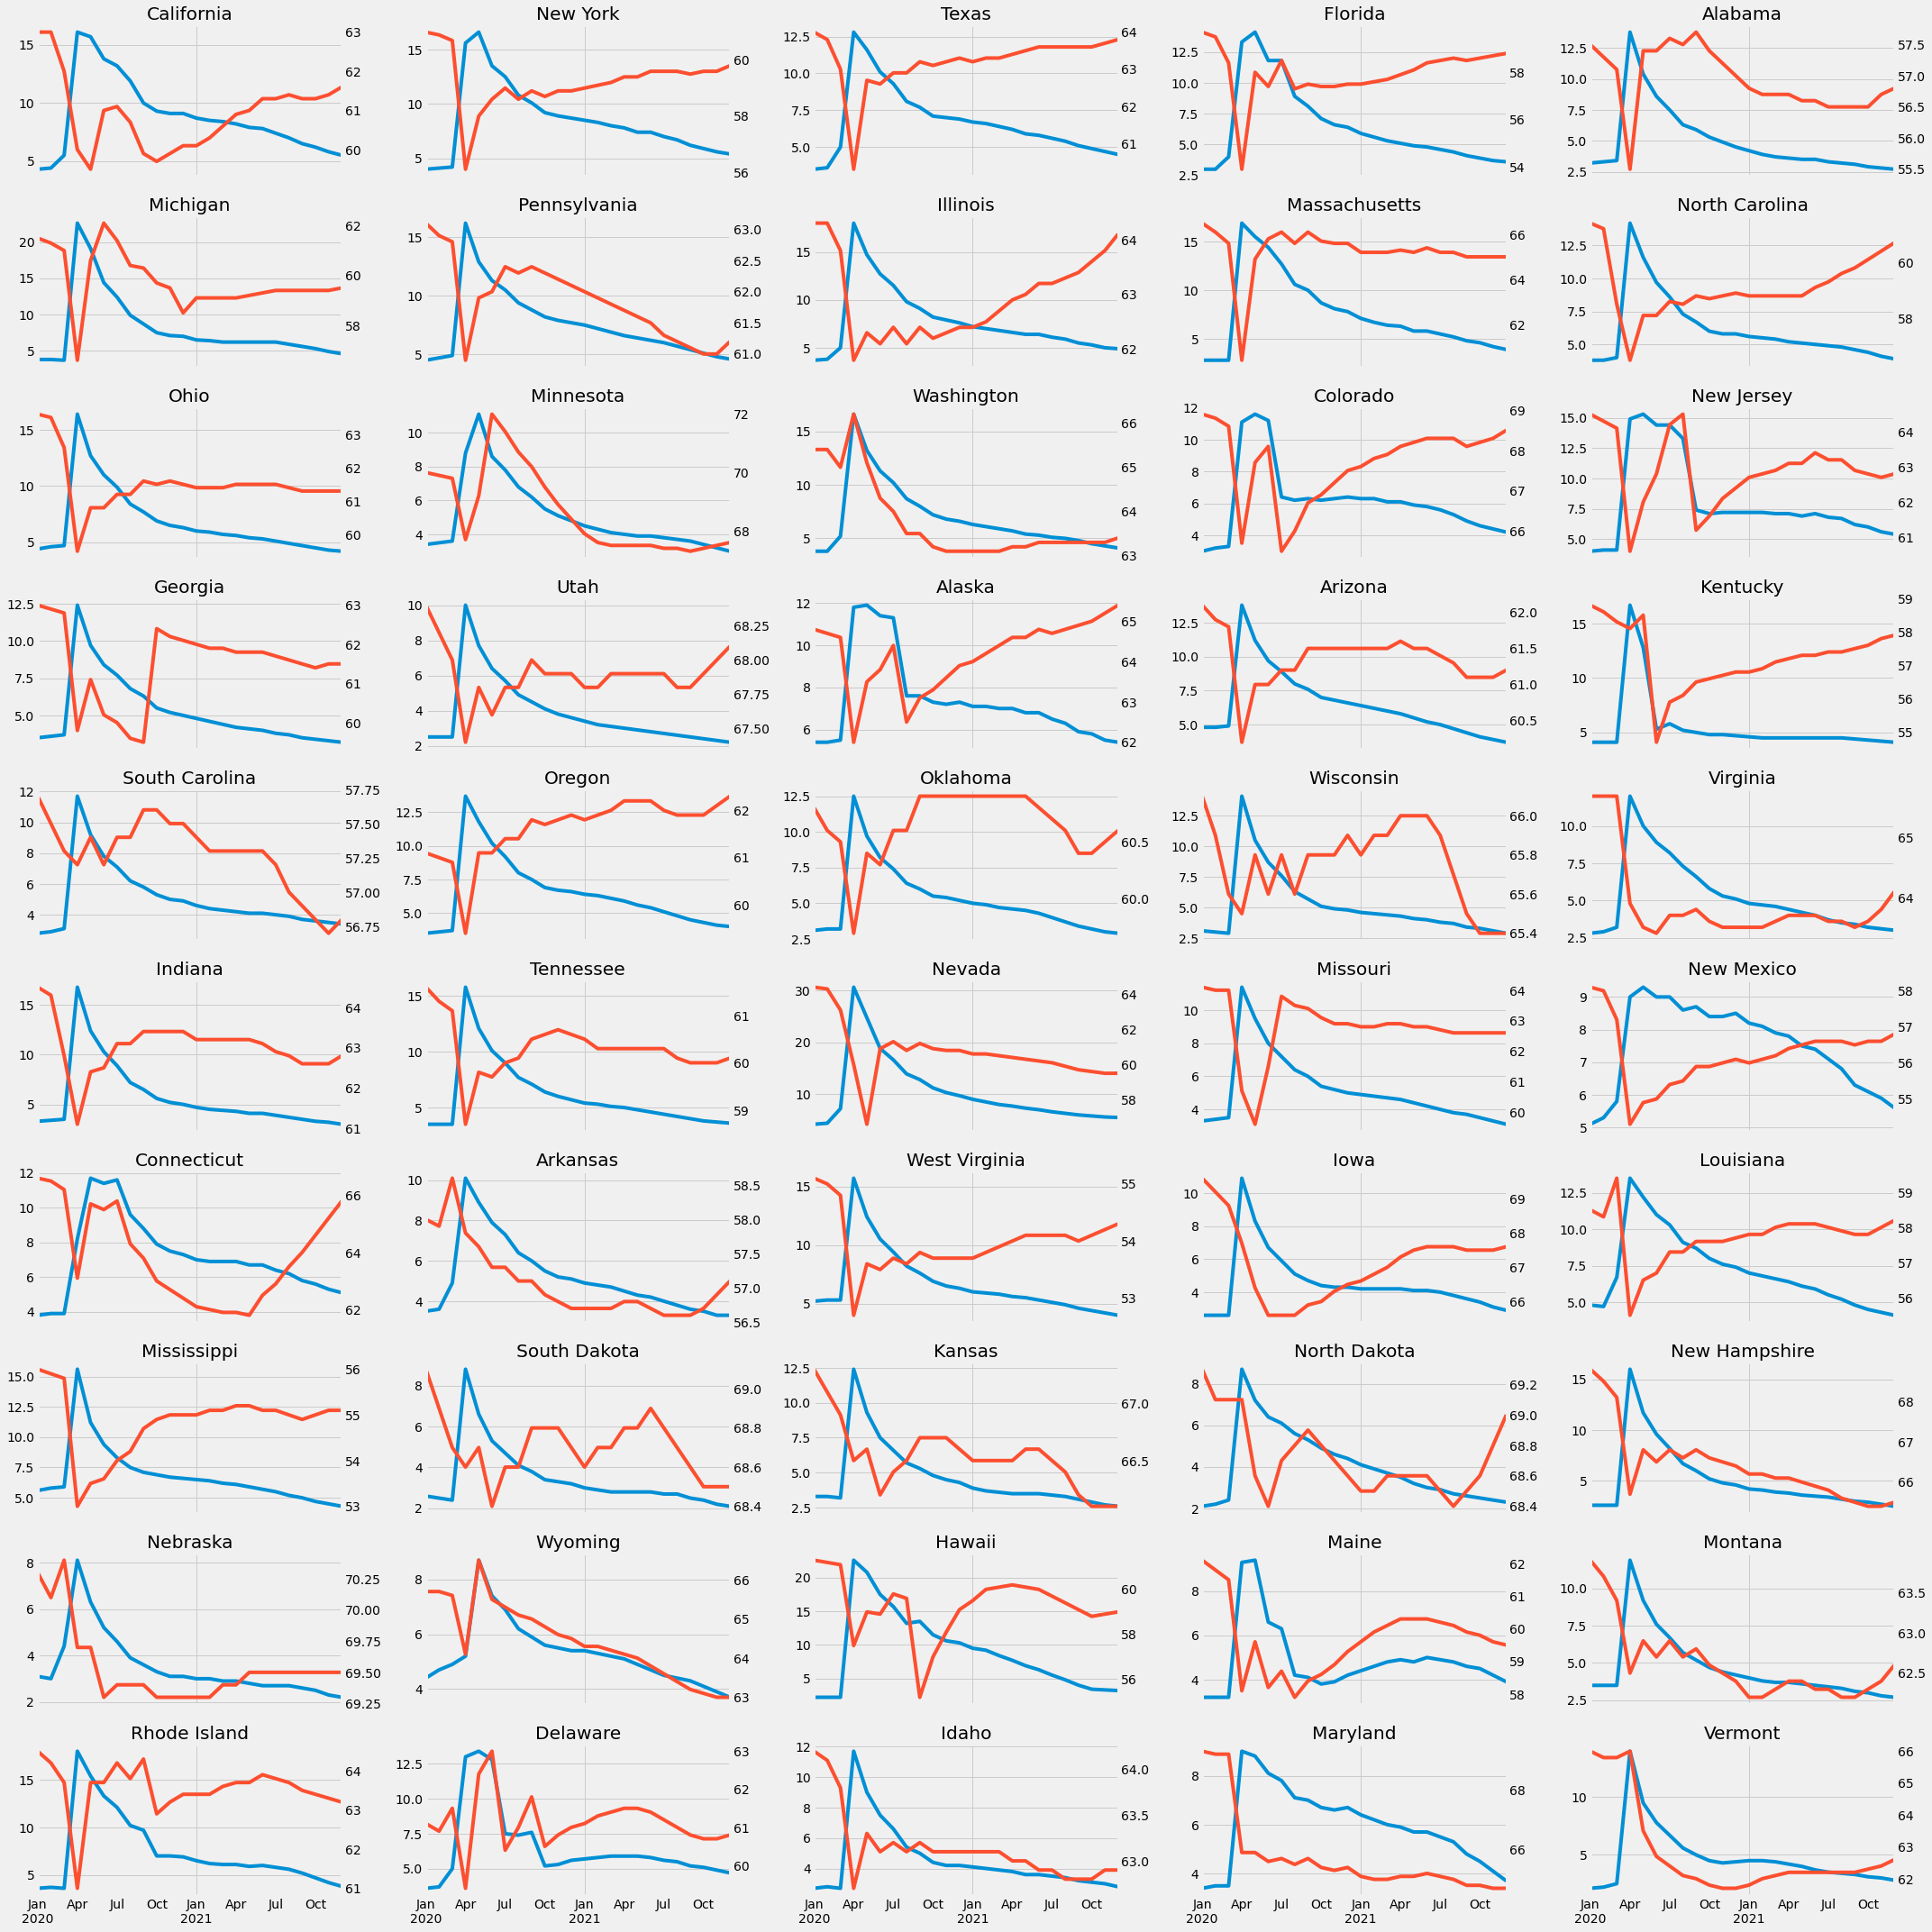

In [208]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

# For single state

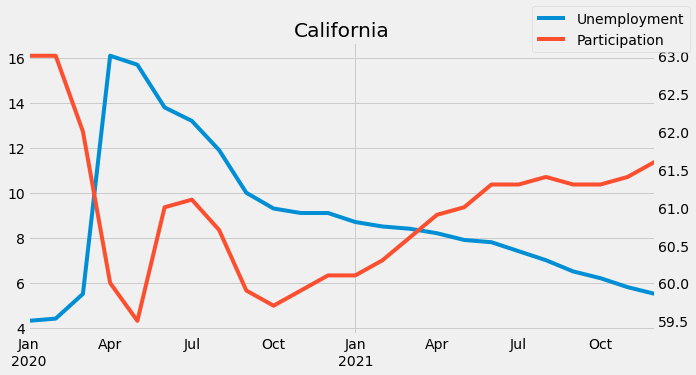

In [212]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()